In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
#load the data from the method 
boston=load_boston()

In [3]:
# Take the feature data and load into DataFrame
features=pd.DataFrame(boston.data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=['TARGET'])

In [4]:
#concatenate the features with target and set axis as 1 for column wise concatenation#concat
data=pd.concat([features,target],axis=1)

In [5]:
#split the data as training and test
sep=0.8*len(data)
sep=int(sep)
x_train=np.array(data['LSTAT'][0:sep])
y_train=np.array(data['TARGET'][0:sep])
x_test=np.array(data['LSTAT'][sep:])
y_test=np.array(data['TARGET'][sep:])
#normalize the dataset
x_train = x_train/x_train.mean()
y_train = y_train/y_train.mean()
x_test = x_test/x_test.mean()
y_test = y_test/y_test.mean()

Text(0,0.5,'price')

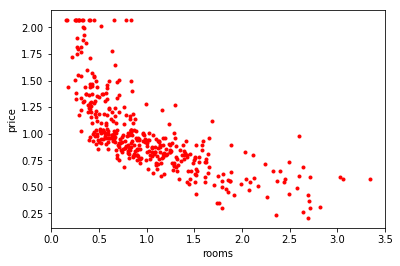

In [6]:
#initial plot of lstat feature and target
plt.plot(x_train,y_train,'r.')
plt.xlabel("rooms")
plt.ylabel("price")

In [7]:
def hypothesis(a,x,b,c,d):
    return a * x*x*x +b*x*x + c*x +d 

In [8]:
def error(a,x,b,y,c,d):
    e=0
    m=len(y)
    for i in range(m):
        e+=np.power((hypothesis(a,x[i],b,c,d)-y[i]),2)
    return (1/(2*m)*e)

In [9]:
def step_gradient(a,x,b,y,c,d,learning_rate):
    grad_a=0
    grad_b=0
    grad_c=0
    grad_d=0

    m=len(x)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,x[i],b,c,d)-y[i])*(x[i]*x[i]*x[i])
        grad_b += 2/m * (hypothesis(a,x[i],b,c,d)-y[i])*(x[i]*x[i])
        grad_c += 2/m * (hypothesis(a,x[i],b,c,d)-y[i])*(x[i])
        grad_d += 2/m * (hypothesis(a,x[i],b,c,d)-y[i])
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
    d=d-(grad_d*learning_rate)
    
    
    return a,b,c,d

In [10]:
def descend(initial_a,initial_b,initial_c,initial_d,x,y,learning_rate,iterations):
    a=initial_a
    b=initial_b
    c=initial_c
    d=initial_d
    
    for i in range(iterations):
        e=error(a,x,b,y,c,d)
        a,b,c,d=step_gradient(a,x,b,y,c,d,learning_rate)
        if i %1000==0:
            print(f"Error: {e},a:{a},b:{b},c:{c},d:{d}")
    return a,b,c,d

In [11]:
init_a=0
init_b=0
init_c=0
init_d=0

iters=10000
learning_rate=0.001

In [12]:
final_a,final_b,final_c,final_d=descend(init_a,init_b,init_c,init_d,x_train,y_train,learning_rate,iters)

Error: 0.5731901720028545,a:0.0029880561782599283,b:0.001951261502019782,c:0.0016745801813193046,d:0.0019999999999999987
Error: 0.09884005246046619,a:-0.09057160371016025,b:0.08463661450697972,c:0.29561266274508585,d:0.6768924266639399
Error: 0.0742814565526907,a:-0.04966199765785201,b:-0.03189592981372982,c:0.24398443596782243,d:0.8497666373288176
Error: 0.05971593440311465,a:-0.0077171723453535795,b:-0.13343036241132933,c:0.18378196002447839,d:0.9650738293019722
Error: 0.05051401651889066,a:0.02588670809637438,b:-0.21323748743680893,c:0.13299666873239369,d:1.055844410772086
Error: 0.04468829287120042,a:0.05229562489242009,b:-0.27518744585690624,c:0.09071400198752341,d:1.1284639031686101
Error: 0.04099015953127012,a:0.07295858283606665,b:-0.32293074874486466,c:0.055253687754992495,d:1.186755576894344
Error: 0.0386328829199131,a:0.08905964759578625,b:-0.3594014228763501,c:0.025221976743684614,d:1.2336761012104527
Error: 0.037120739652204346,a:0.10154083677987806,b:-0.3869307130291975,c

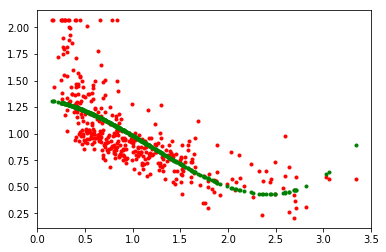

In [13]:
plt.plot(x_train,y_train,'r.',x_train,hypothesis(final_a,x_train,final_b,final_c,final_d),'g.')

In [14]:
a=0.11115003973192282
b=-0.40736924479734254
c=-0.022767585145209168
d=1.3022887391864848

error(a,x_train,b,y_train,c,d)

0.03614058627541971

In [15]:
error(a,x_test,b,y_test,c,d)

0.029962309459333345